In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle


In [2]:
eval_path = './evaluation_data/'

raw_eval_dict = dict()
for filename in os.listdir(eval_path):
    with open(eval_path + filename, 'rb') as f:
        raw_eval_dict[filename] = pickle.load(f)

In [3]:
def read_data_to_DataFrama(raw_dict):

    return_keys = [key for key in raw_dict.keys() if '_returns' in key]
    temp_dict = dict()
    for key in return_keys:
        target_return, _ = key.split('_')
        target_return = int(target_return)
        temp_dict[target_return] = raw_dict[key]
    
    return pd.DataFrame(temp_dict)

eval_dict = {k: read_data_to_DataFrama(v) for k, v in raw_eval_dict.items()}

In [4]:
def get_plot_statistics(df):
    
    target_rewards = df.columns.to_numpy()
    reward_mean = df.to_numpy().mean(axis=0)
    reward_std = df.to_numpy().std(axis=0)

    return target_rewards, reward_mean, reward_std

plot_dict = {k: get_plot_statistics(v) for k, v in eval_dict.items()}

In [5]:
my_dict = {0: 10, 1: 11, 2: 22}
my_list = [5, 55, 555]

for x in zip(my_list, my_dict.items()):
    print(x)

(5, (0, 10))
(55, (1, 11))
(555, (2, 22))


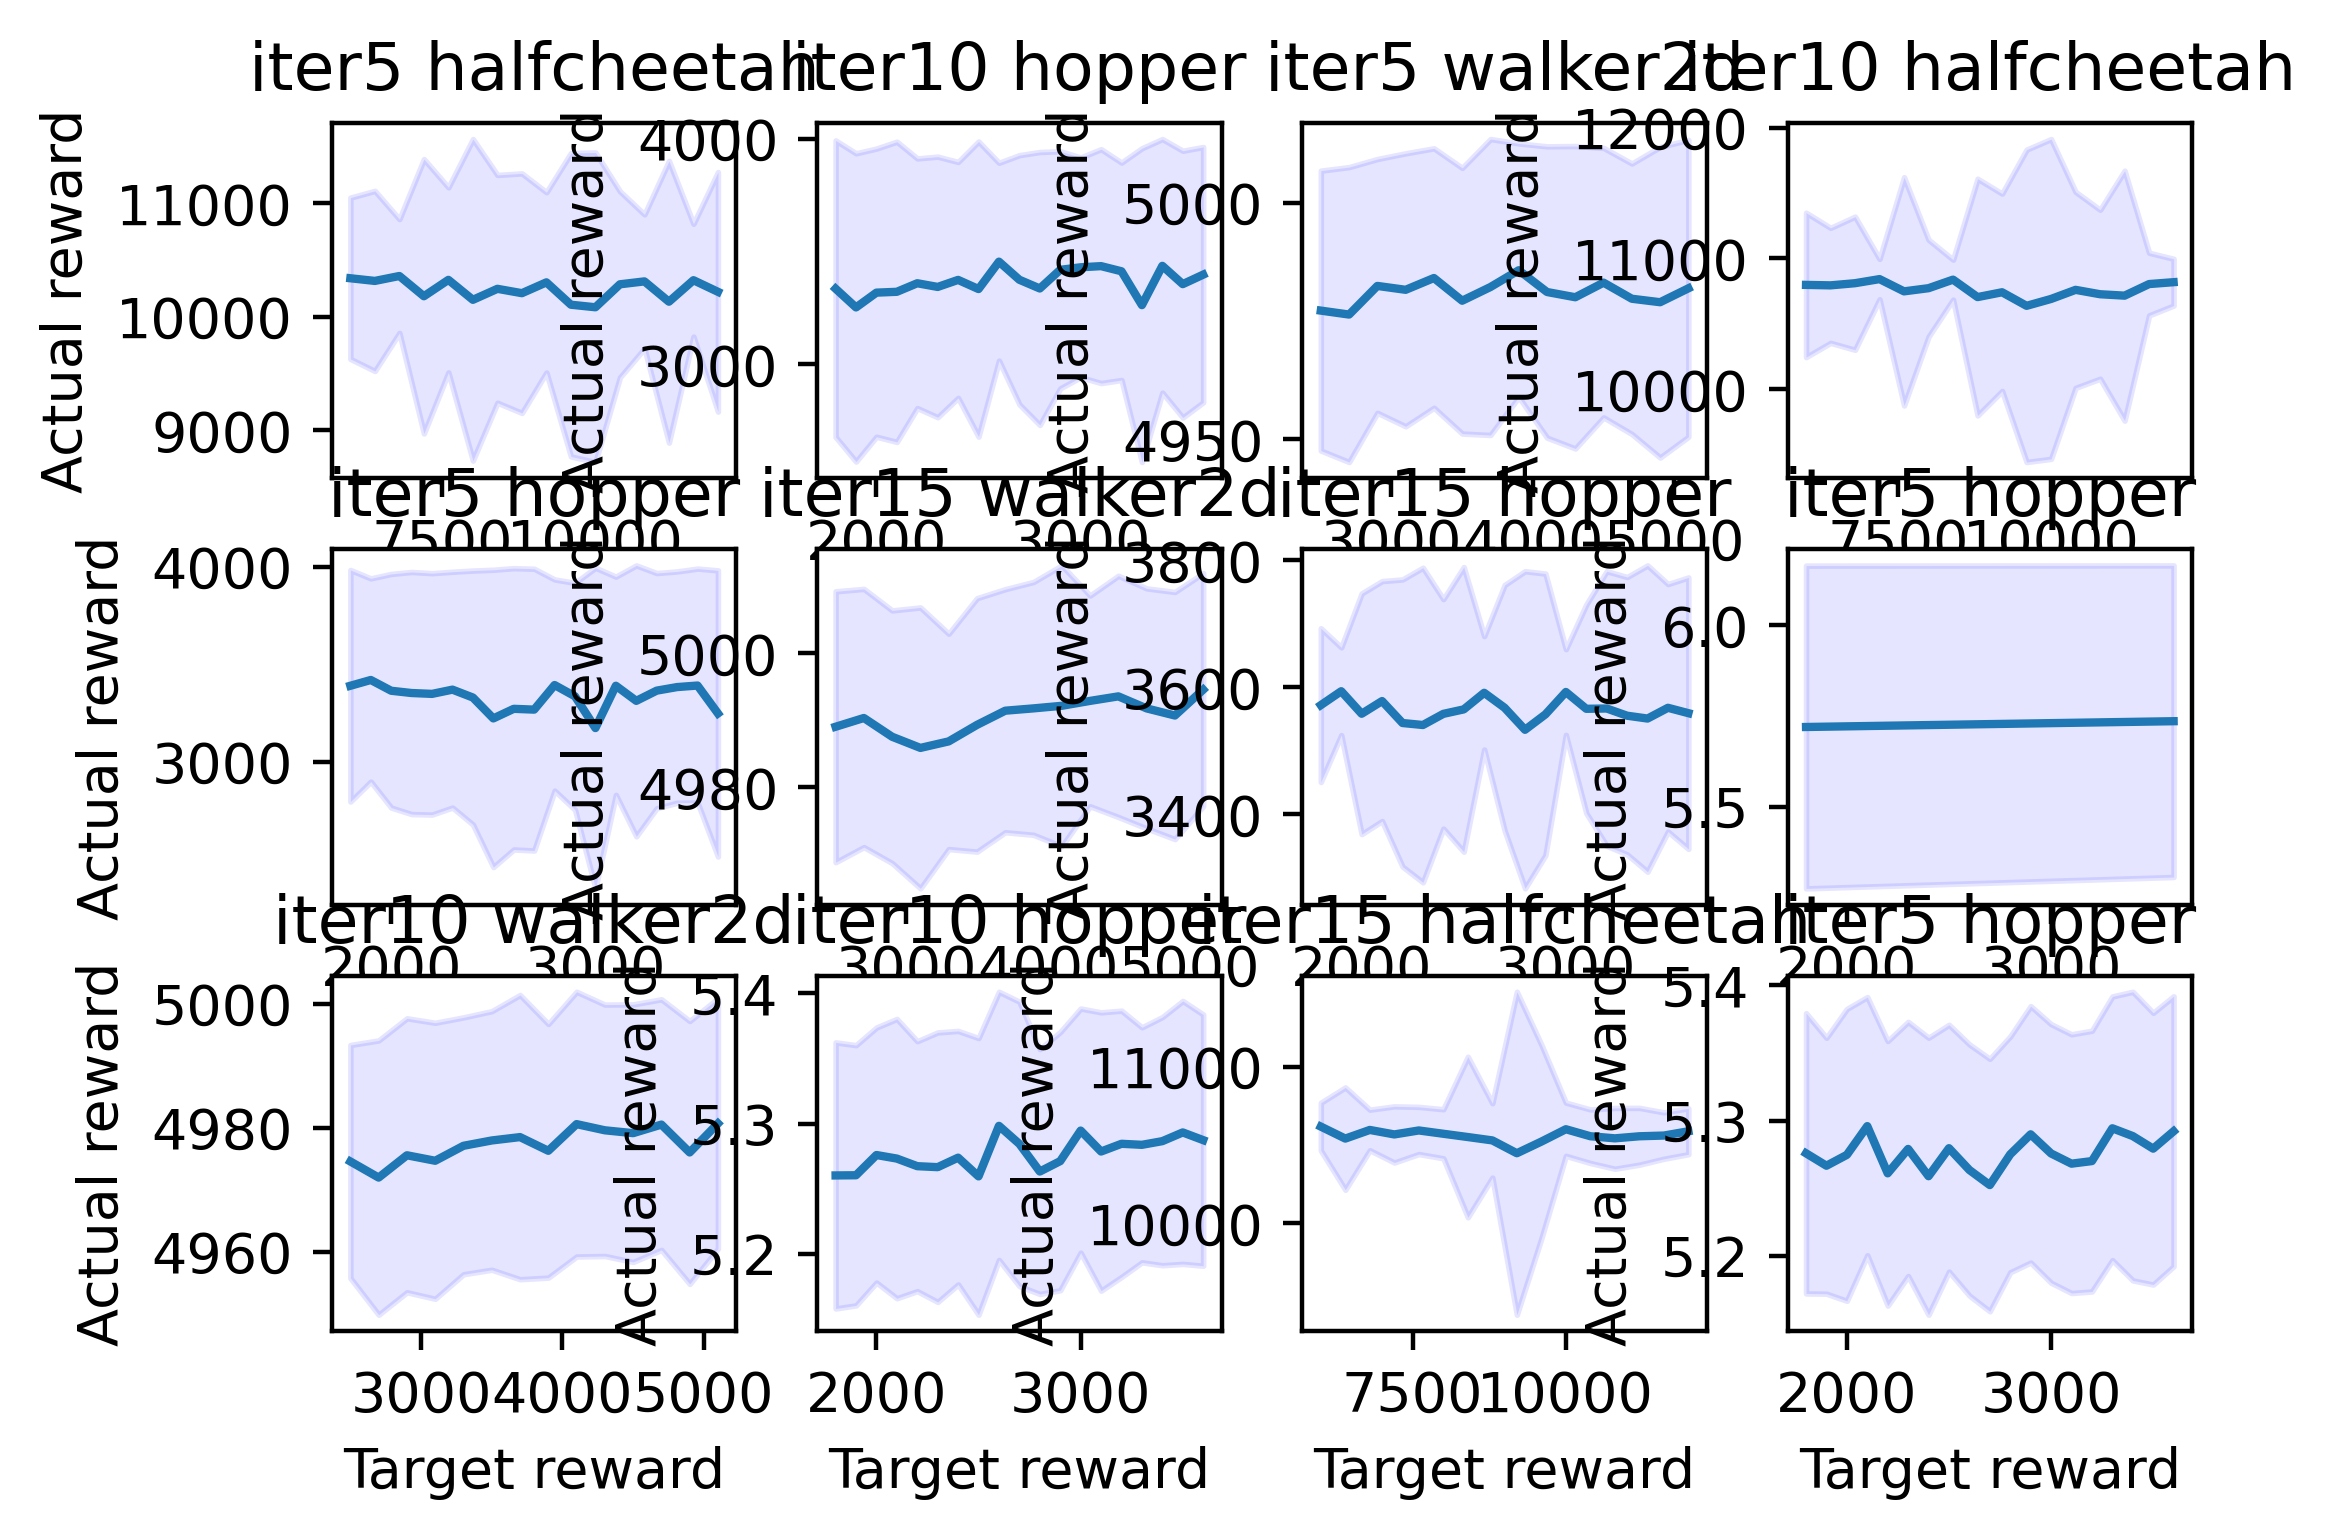

In [6]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable
fig, axs = plt.subplots(3,4, dpi=400)

for ax, (exp_name, values) in zip(axs.flatten(), plot_dict.items()):
    x, y, ci = values

    ax.plot(x, y)
    ax.set_title(' '.join(np.take(exp_name.split('-'), (0,3))))
    ax.set_xlabel('Target reward')
    ax.set_ylabel('Actual reward')
    ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

    #make_axes_area_auto_adjustable(ax)

plt.show()